In [4]:
%matplotib notebook

UsageError: Line magic function `%matplotib` not found.


In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [27]:
import tweepy
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

import json
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [28]:
# Set up Twitter API Authentication 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [29]:
#PlotBot Functions
#user_Mentioned()
#analyze_Sentiments()
#plotSentiments()
#tweet_myPlot()
#previously_Analyzed()
#timer_scan()

In [30]:
bot_user = "@PlotBot5"
bot_tweets = api.user_timeline(bot_user,count=1)[0] #get only the last/latest tweet
user_mention = bot_tweets["entities"]["user_mentions"][0]["screen_name"]
user_acc = "@"+user_mention
user_acc

'@MechaDragon101'

In [31]:
sentiments = []
compound_sentiments = []
positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

target = user_acc    
counter = 1    
oldest_tweet= None

for x in range(25):
    extract_500_tweets = api.user_timeline(user_acc,max_id=oldest_tweet)
    
    for tweets in extract_500_tweets:
        tweet_sentiment = tweets["text"]
        #tweet_date = tweets["created date"]
        
        result = analyzer.polarity_scores(tweet_sentiment)
        compound = result["compound"]
        positive = result["pos"]
        negative = result["neg"]
        neutral = result["neu"]
        tweets_ago = counter
            
        oldest_tweet = tweets['id'] - 1
        
        
        # Add sentiments for each tweet into a list
        sentiments.append({"Date": tweets["created_at"], 
                           "Compound": compound,
                           "Positive": positive,
                           "Negative": neutral,
                           "Neutral": negative,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter += 1        
            

In [32]:
sen_df = pd.DataFrame(sentiments)
sen_df

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Mon Jul 16 01:54:34 +0000 2018,1.000,0.000,0.000,1
1,0.0000,Mon Jul 16 01:53:43 +0000 2018,1.000,0.000,0.000,2
2,-0.3400,Mon Jul 16 01:50:32 +0000 2018,0.745,0.255,0.000,3
3,0.3182,Mon Jul 16 01:48:20 +0000 2018,0.796,0.000,0.204,4
4,0.0000,Mon Jul 16 01:44:00 +0000 2018,1.000,0.000,0.000,5
5,0.0000,Mon Jul 16 01:43:23 +0000 2018,1.000,0.000,0.000,6
6,-0.4003,Mon Jul 16 01:43:15 +0000 2018,0.690,0.310,0.000,7
7,0.0000,Mon Jul 16 01:40:53 +0000 2018,1.000,0.000,0.000,8
8,0.0000,Mon Jul 16 01:35:06 +0000 2018,1.000,0.000,0.000,9
9,0.2960,Mon Jul 16 01:26:34 +0000 2018,0.891,0.000,0.109,10


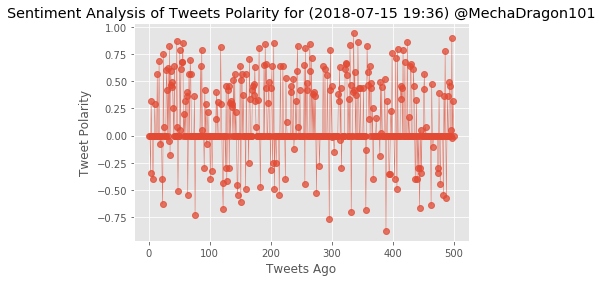

In [33]:
x_val = sen_df["Tweets Ago"]
y_val = sen_df["Compound"]

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")

plt.title(f"Sentiment Analysis of Tweets for ({now}) {user_acc}")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#plt.xlim([x_val.max()+1,x_val.min()-1])
#plt.legend()

plt.plot(x_val,y_val,linewidth=0.5,marker='o',alpha=0.75)

plt.savefig("TweetPolarity.png",status = "Twitter Analysis @{user_acc}")
plt.show()

In [40]:

#api.update_status("TwitterSentiment Analysis {user_acc}")
api.update_with_media("TweetPolarity.png",status = f"Twitter Analysis @{user_acc} Thx(@BotSentimental")

{'contributors': None,
 'coordinates': None,
 'created_at': 'Mon Jul 16 03:05:01 +0000 2018',
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/NdzRJuvvhD',
    'expanded_url': 'https://twitter.com/JaRoyalty876/status/1018692954171424768/photo/1',
    'id': 1018692952967659521,
    'id_str': '1018692952967659521',
    'indices': [44, 67],
    'media_url': 'http://pbs.twimg.com/media/DiMf1-zUwAEP_KD.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DiMf1-zUwAEP_KD.jpg',
    'sizes': {'large': {'h': 288, 'resize': 'fit', 'w': 432},
     'medium': {'h': 288, 'resize': 'fit', 'w': 432},
     'small': {'h': 288, 'resize': 'fit', 'w': 432},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/NdzRJuvvhD'}],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 115997117,
    'id_str': '115997117',
    'indices': [18, 33],
    'name': "Mecha's life sucks. Hey Alexa, play some Despacito",
    'screen_name': 'M